In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
import warnings

data = pd.read_csv('epi_r.csv')

In [34]:
df =data.iloc[: , 1:30]
df.dropna(axis=1, how='any', inplace=True)
# df.info()

y = df['rating']
x = df.drop(['rating'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=456)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.07960559220678287


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

[-0.0847858  -0.10315122 -0.08465498 -0.07613978 -0.08107222]


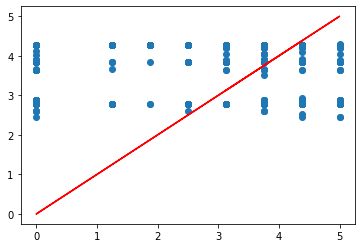

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

svr = SVR()
svr.fit(x_train, y_train)
# cross_val_socre(svr, x_train, y_train, cv=5)
y_train_pred = svr.predict(x_train)

print(svr.score(x_train, y_train))
print(cross_val_score(svr, x_train, y_train, cv=5))

plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, c='r')

# Change rating to binary classifier

In [60]:
df.loc[df['rating']>df['rating'].mean(),'rating_level'] = 1
df.loc[df['rating']<=df['rating'].mean(),'rating_level'] = 0

y1 = df['rating_level']
x1 = df.drop(['rating', 'rating_level'], axis=1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=456)

In [68]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(x1_train, y1_train)
print(svc.score(x1_train, y1_train))
print(cross_val_score(svc, x1_train, y1_train, cv=5))


0.796895455395549
[0.79401683 0.79619819 0.79738155 0.79956359 0.79731837]


### As transfering the rating into a binary classifier, the model accuracy increased significantly